<a href="https://colab.research.google.com/github/iamjudy/Movies_chatbot/blob/main/bi_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **BADM 557 Business Intelligence Final Project- Movies Recommender Systems**


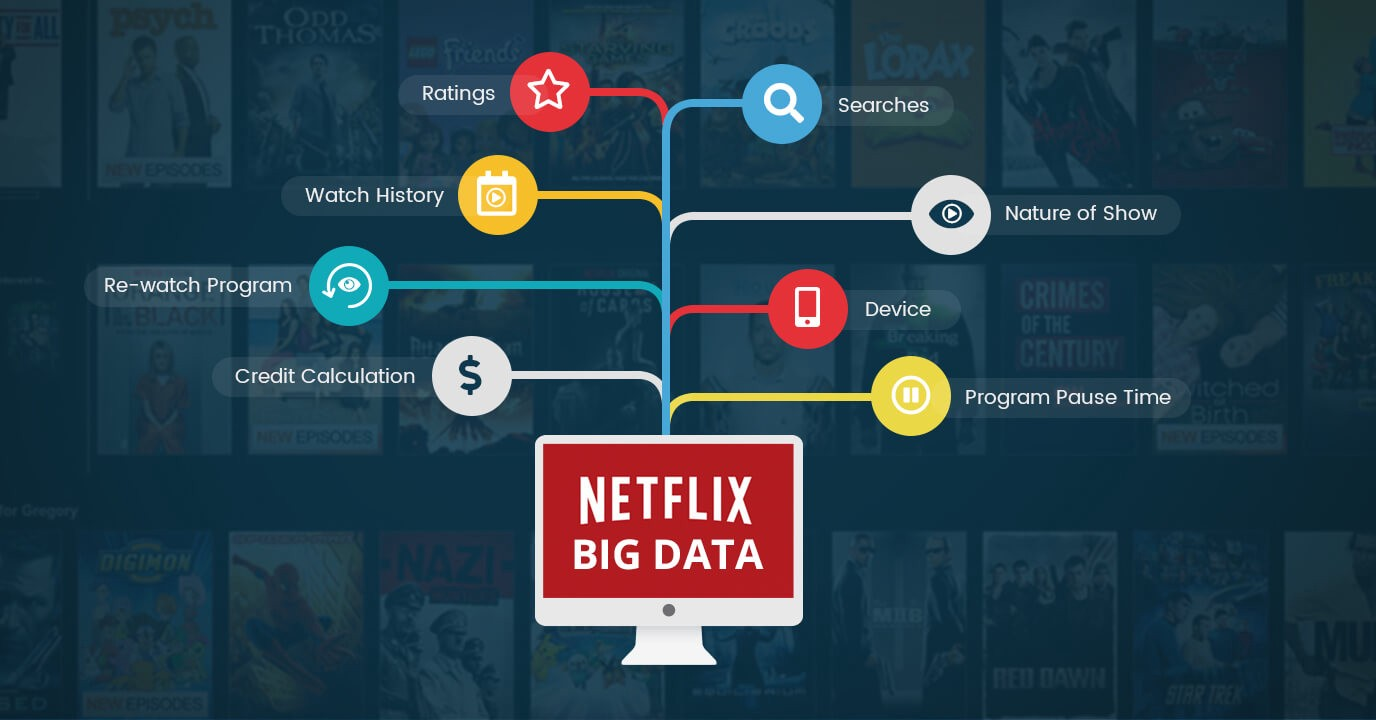

In this project, we build a baseline Movie Recommendation System using [TMDB 5000 Movie Dataset](https://www.kaggle.com/tmdb/tmdb-movie-metadata).

## Data Preparation

In [ ]:
import pandas as pd 
import numpy as np 
df1 = pd.read_csv('tmdb_5000_credits.csv', engine="python")
df2 = pd.read_csv('tmdb_5000_movies.csv', engine="python")

In [ ]:
df1.columns

Index(['movie_id', 'title', 'cast', 'crew'], dtype='object')

In [ ]:
df2.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count'],
      dtype='object')

In [ ]:
df1.columns = ['id','tittle','cast','crew']
df2= df2.merge(df1,on='id')

In [ ]:
df2.head(5)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,tittle,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


> *  **Content Based Filtering**: They suggest similar items based on a particular item. This system uses item metadata, such as genre, director, description, actors, etc. for movies, to make these recommendations. The general idea behind these recommender systems is that if a person liked a particular item, he or she will also like an item that is similar to it.

## **TF-IDF**

In [ ]:
df2['overview'].head(5)

0    In the 22nd century, a paraplegic Marine is di...
1    Captain Barbossa, long believed to be dead, ha...
2    A cryptic message from Bond’s past sends him o...
3    Following the death of District Attorney Harve...
4    John Carter is a war-weary, former military ca...
Name: overview, dtype: object

The key point is to compute the Term Frequency-Inverse Document Frequency (TF-IDF) vectors for each overview.


The overall importance of each word to the documents in which they appear is equal to **TF * IDF**.

In [ ]:
#Import TfIdfVectorizer from scikit-learn
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(stop_words='english')

#Replace NaN with an empty string
df2['overview'] = df2['overview'].fillna('')

#Construct the required TF-IDF matrix by fitting and transforming the data
tfidf_matrix = tfidf.fit_transform(df2['overview'])

#Output the shape of tfidf_matrix
tfidf_matrix.shape

(4803, 20978)

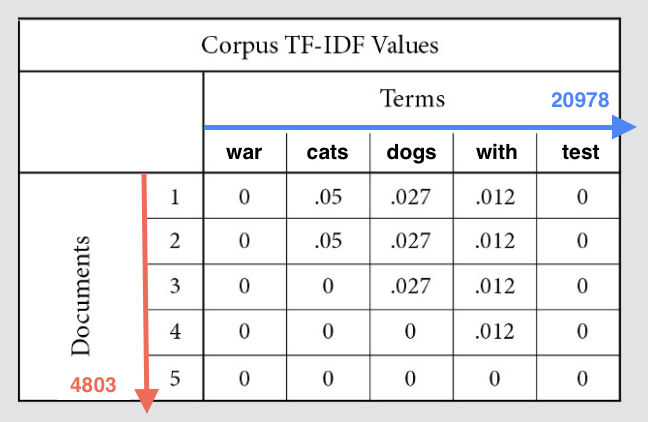

It means that 20987 different words were used to describe the 4803 movies in our dataset. 

We will use the cosine similarity to calculate a numeric quantity that denotes the similarity between two movies. 



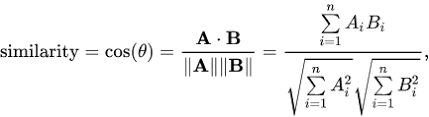

In [ ]:
# Import linear_kernel
from sklearn.metrics.pairwise import linear_kernel

cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

Define a mechanism to identify the index of a movie in our metadata DataFrame, given its title.

In [ ]:
#Construct a reverse map of indices and movie titles
indices = pd.Series(df2.index, index=df2['title']).drop_duplicates()
indices.head(5)

title
Avatar                                      0
Pirates of the Caribbean: At World's End    1
Spectre                                     2
The Dark Knight Rises                       3
John Carter                                 4
dtype: int64

We are going to define a function that takes in a movie title, and how many similar movies you want to get as an input parameters.

In [ ]:
def get_recommendations(title, n, cosine_sim=cosine_sim):
    # Get the index of the input movie
    idx = indices[title]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the n most similar movies
    sim_scores = sim_scores[1:n+1]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top n most similar movies
    return df2['title'].iloc[movie_indices], sim_scores

In [ ]:
get_recommendations('The Dark Knight Rises', 10, cosine_sim)

(65                              The Dark Knight
 299                              Batman Forever
 428                              Batman Returns
 1359                                     Batman
 3854    Batman: The Dark Knight Returns, Part 2
 119                               Batman Begins
 2507                                  Slow Burn
 9            Batman v Superman: Dawn of Justice
 1181                                        JFK
 210                              Batman & Robin
 Name: title, dtype: object,
 [(65, 0.30151176591665485),
  (299, 0.29857045255396825),
  (428, 0.2878505467001694),
  (1359, 0.264460923827995),
  (3854, 0.18545003006561456),
  (119, 0.16799626199850706),
  (2507, 0.16682891043358278),
  (9, 0.1337400906655523),
  (1181, 0.13219702138476813),
  (210, 0.13045537014449818)])

In [ ]:
get_recommendations('The Avengers', 5, cosine_sim)

(7       Avengers: Age of Ultron
 3144                    Plastic
 1715                    Timecop
 4124         This Thing of Ours
 3311      Thank You for Smoking
 Name: title, dtype: object,
 [(7, 0.1463743318256992),
  (3144, 0.12279141010343961),
  (1715, 0.11038518674285192),
  (4124, 0.10752921414824139),
  (3311, 0.10620265000347046)])

 **Casts, Genres and Keywords Based Recommender**

In order to increase the quality of our recommender, we extract the three most important actors/actresses, the director and the keywords associated with the input movie.

In [ ]:
# Parse the stringified features into their corresponding python objects
from ast import literal_eval

features = ['cast', 'crew', 'keywords', 'genres']
for feature in features:
    df2[feature] = df2[feature].apply(literal_eval)

In [ ]:
from pprint import pprint

pprint(df2['crew'].head(1).to_dict())

{0: [{'credit_id': '52fe48009251416c750aca23',
      'department': 'Editing',
      'gender': 0,
      'id': 1721,
      'job': 'Editor',
      'name': 'Stephen E. Rivkin'},
     {'credit_id': '539c47ecc3a36810e3001f87',
      'department': 'Art',
      'gender': 2,
      'id': 496,
      'job': 'Production Design',
      'name': 'Rick Carter'},
     {'credit_id': '54491c89c3a3680fb4001cf7',
      'department': 'Sound',
      'gender': 0,
      'id': 900,
      'job': 'Sound Designer',
      'name': 'Christopher Boyes'},
     {'credit_id': '54491cb70e0a267480001bd0',
      'department': 'Sound',
      'gender': 0,
      'id': 900,
      'job': 'Supervising Sound Editor',
      'name': 'Christopher Boyes'},
     {'credit_id': '539c4a4cc3a36810c9002101',
      'department': 'Production',
      'gender': 1,
      'id': 1262,
      'job': 'Casting',
      'name': 'Mali Finn'},
     {'credit_id': '5544ee3b925141499f0008fc',
      'department': 'Sound',
      'gender': 2,
      'id': 1729,
 

In [ ]:
# Get the director's name from the crew feature. If director is not listed, return NaN
def get_director(x):
    for i in x:
        if i['job'] == 'Director':
            return i['name']
    return np.nan

In [ ]:
# Returns the list top 3 elements or entire list; whichever is more.
def get_list(x):
    if isinstance(x, list):
        names = [i['name'] for i in x]
        #Check if more than 3 elements exist. If yes, return only first three. If no, return entire list.
        if len(names) > 3:
            names = names[:3]
        return names

    #Return empty list in case of missing/malformed data
    return []

In [ ]:
# Define new director, cast, genres and keywords features that are in a suitable form.
df2['director'] = df2['crew'].apply(get_director)

features = ['cast', 'keywords', 'genres']
for feature in features:
    df2[feature] = df2[feature].apply(get_list)

In [ ]:
# Print the new features of the first 3 films
df2[['title', 'cast', 'director', 'keywords', 'genres']].head(3)

,title,cast,director,keywords,genres
0,Avatar,"[Sam Worthington, Zoe Saldana, Sigourney Weaver]",James Cameron,"[culture clash, future, space war]","[Action, Adventure, Fantasy]"
1,Pirates of the Caribbean: At World's End,"[Johnny Depp, Orlando Bloom, Keira Knightley]",Gore Verbinski,"[ocean, drug abuse, exotic island]","[Adventure, Fantasy, Action]"
2,Spectre,"[Daniel Craig, Christoph Waltz, Léa Seydoux]",Sam Mendes,"[spy, based on novel, secret agent]","[Action, Adventure, Crime]"


The next step would be to convert the names and keyword instances into lowercase and strip all the spaces between them. 

So that our vectorizer doesn't count the Johnny of "Johnny Depp" and "Johnny Galecki" as the same.

In [ ]:
# Function to convert all strings to lower case and strip names of spaces
def clean_data(x):
    if isinstance(x, list):
        return [str.lower(i.replace(" ", "")) for i in x]
    else:
        #Check if director exists. If not, return empty string
        if isinstance(x, str):
            return str.lower(x.replace(" ", ""))
        else:
            return ''

In [ ]:
# Apply clean_data function to your features.
features = ['cast', 'keywords', 'director', 'genres']

for feature in features:
    df2[feature] = df2[feature].apply(clean_data)

In [ ]:
df2[['title', 'cast', 'director', 'keywords', 'genres']].head(3)

,title,cast,director,keywords,genres
0,Avatar,"[samworthington, zoesaldana, sigourneyweaver]",jamescameron,"[cultureclash, future, spacewar]","[action, adventure, fantasy]"
1,Pirates of the Caribbean: At World's End,"[johnnydepp, orlandobloom, keiraknightley]",goreverbinski,"[ocean, drugabuse, exoticisland]","[adventure, fantasy, action]"
2,Spectre,"[danielcraig, christophwaltz, léaseydoux]",sammendes,"[spy, basedonnovel, secretagent]","[action, adventure, crime]"


Create our "metadata soup", which is a string that contains all the metadata that we want to feed to our vectorizer.

(namely actors, director and keywords)

In [ ]:
def create_soup(x):
    return ' '.join(x['keywords']) + ' ' + ' '.join(x['cast']) + ' ' + x['director'] + ' ' + ' '.join(x['genres'])
    
df2['soup'] = df2.apply(create_soup, axis=1)

In [ ]:
df2['soup'].head(3)

0    cultureclash future spacewar samworthington zo...
1    ocean drugabuse exoticisland johnnydepp orland...
2    spy basedonnovel secretagent danielcraig chris...
Name: soup, dtype: object

## **Bag of Words**

This time we use the **CountVectorizer()** instead of TF-IDF. 

Because we do not want to down-weight the presence of an actor/director if he or she has acted or directed in relatively more movies.

In [ ]:
# Import CountVectorizer and create the count matrix
from sklearn.feature_extraction.text import CountVectorizer

count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(df2['soup'])

In [ ]:
# count.get_feature_names_out()

In [ ]:
# Compute the Cosine Similarity matrix based on the count_matrix
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim2 = cosine_similarity(count_matrix, count_matrix)

In [ ]:
# Reset index of our main DataFrame and construct reverse mapping as before
df2 = df2.reset_index()
indices = pd.Series(df2.index, index=df2['title'])

After building the count matrix, we can now reuse our **get_recommendations()** function 

by passing in the new cosine_sim2 matrix as your third argument.

In [ ]:
get_recommendations('The Dark Knight Rises', 10, cosine_sim2)

(65               The Dark Knight
 119                Batman Begins
 4638    Amidst the Devil's Wings
 1196                The Prestige
 3073           Romeo Is Bleeding
 3326              Black November
 1503                      Takers
 1986                      Faster
 303                     Catwoman
 747               Gangster Squad
 Name: title, dtype: object,
 [(65, 0.7),
  (119, 0.7),
  (4638, 0.5477225575051663),
  (1196, 0.4),
  (3073, 0.4),
  (3326, 0.3585685828003181),
  (1503, 0.33541019662496846),
  (1986, 0.33541019662496846),
  (303, 0.31622776601683794),
  (747, 0.31622776601683794)])

We see that our recommender has been successful in capturing more information due to more metadata. 

It is more likely that Marvels or DC comics fans will like the movies of the same production house.

In [ ]:
get_recommendations('The Godfather', 5, cosine_sim2)

(867      The Godfather: Part III
 2731      The Godfather: Part II
 4638    Amidst the Devil's Wings
 2649           The Son of No One
 1525              Apocalypse Now
 Name: title, dtype: object,
 [(867, 0.5270462766947299),
  (2731, 0.4216370213557839),
  (4638, 0.3849001794597505),
  (2649, 0.3779644730092272),
  (1525, 0.3333333333333333)])